# BCI Quant Take Home Assignment

This jupyter notebook will show the creation of each figure presented in the report


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


tickers = ['AAPL', 'AMZN', 'GOOG', 'INTC', 'ORCL', 'XOM', 'CVX', 'COP','HES', 'OXY']

date_start = '2012-01-01'
date_end = '2021-12-31'

## Q1. Normality

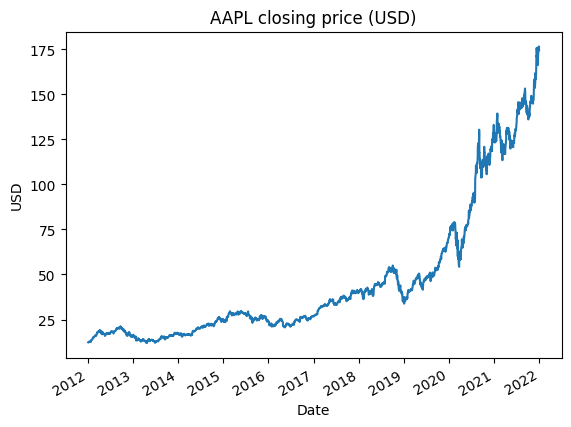

In [3]:
tname = 'AAPL'
ticker = yf.Ticker(tname)
pnl = ticker.history(start=date_start,
               		end = date_end)
close = pnl['Close']
plt.title(f"{tname} closing price (USD)")
plt.xlabel("Year")
plt.ylabel("USD")
close.plot()
plt.show()

### Graphical Tests

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_45405/3619974203.py:10: SyntaxWarning: invalid escape sequence '\m'
  title = f"PDF of Closing Price of {tname} with Fit Normal ($\mu$ = {mean : .2f}, $\sigma$ = {std : .2f})"
/tmp/ipykernel_45405/3619974203.py:10: SyntaxWarning: invalid escape sequence '\s'
  title = f"PDF of Closing Price of {tname} with Fit Normal ($\mu$ = {mean : .2f}, $\sigma$ = {std : .2f})"


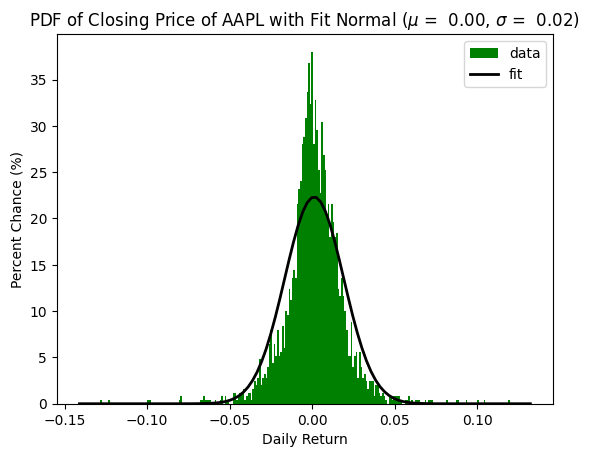

In [4]:
returns = close.pct_change().dropna().values #go from 0-1 to 0-100
mean, std = norm.fit(returns)

plt.hist(returns, bins=250, density=True, color='g', label="data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2, label="fit")
title = f"PDF of Closing Price of {tname} with Fit Normal ($\mu$ = {mean : .2f}, $\sigma$ = {std : .2f})"
plt.title(title)
plt.legend()

plt.xlabel("Daily Return")
plt.ylabel("Percent Chance (%)")
plt.show()

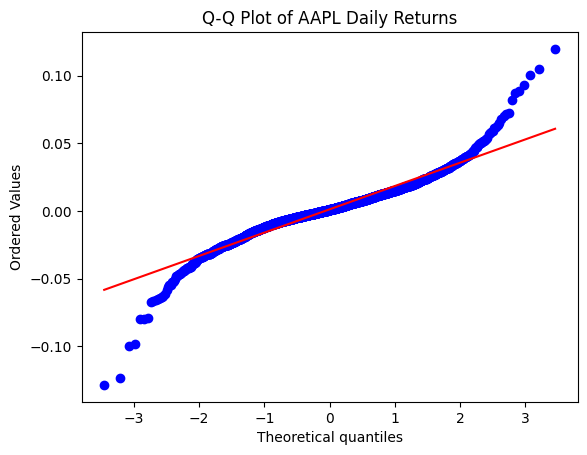

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(returns, dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {tname} Daily Returns")
plt.show()

#TODO : add legend

### Quantative Values


In [ ]:
## TODO: comptue Kurtosis, Skewness for hte JB test

## Q2. OLS  

In [58]:
# TODO: List the assumption for OLS, show why they do not apply and compute the params anyways for completeness

# Q3. Correlations

In [8]:
yf.download('HES',
            start= date_start,
            end=date_end)

/tmp/ipykernel_45405/3298240724.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('HES',
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HES']: YFTzMissingError('possibly delisted; no timezone found')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HES,HES,HES,HES,HES,HES
Date,,,,,,


In [6]:
data = yf.download(tickers,
                   start = date_start,
                   end = date_end)["Close"]
returns = data.pct_change().dropna()

corr_matrix= returns.corr()
corr_matrix

/tmp/ipykernel_45405/2199997351.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers,
[*******************   40%                       ]  4 of 10 completedHTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: HES"}}}
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['HES']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipykernel_45405/2199997351.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Ticker,,,,,,,,,,
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OXY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Possible Citations 
- http://rama.cont.perso.math.cnrs.fr/pdf/empirical.pdf 